# Module 2: Text into Data: Importing a Text

* DS 5001: Exploratory Text Analytics
* Raf Alvarado

# Set Up

In [1]:
epub_file = "../MOD01--SetUp/pg105.txt"
csv_file = 'austen-persuasion.csv'

In [2]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [3]:
import pandas as pd
%matplotlib inline

# Import file into a dataframe

In [4]:
epub = open(epub_file, 'r', encoding='utf-8-sig').readlines()
df = pd.DataFrame(epub, columns=['line_str'])
df.index.name = 'line_num'
df.line_str = df.line_str.str.strip()

In [5]:
df.sample(10)

,line_str
line_num,
3953,"objects ever to be discerned from the windows,..."
6574,"perhaps, on points which you would little expe..."
5566,November. Even Sophy could not understand it....
411,very opposite from her inclination fixed on. ...
6418,"""My dear Mrs Smith, Mr Elliot's wife has not b..."
2747,"struck by order into another path, ""Is not thi..."
8541,the Project Gutenberg Literary Archive Foundat...
7450,to ponder over in a calmer hour; for while sti...
4330,"Though neither Henrietta, nor Louisa, nor Char..."


# Extract title of work from first line

In [6]:
title = df.loc[0].line_str.replace('The Project Gutenberg EBook of ', '')
df['title'] = title

In [7]:
print(title)

Persuasion, by Jane Austen


In [8]:
df.head()

,line_str,title
line_num,,
0,"The Project Gutenberg EBook of Persuasion, by ...","Persuasion, by Jane Austen"
1,,"Persuasion, by Jane Austen"
2,This eBook is for the use of anyone anywhere a...,"Persuasion, by Jane Austen"
3,almost no restrictions whatsoever. You may co...,"Persuasion, by Jane Austen"
4,re-use it under the terms of the Project Guten...,"Persuasion, by Jane Austen"


# Remove Gutenberg's front and back matter

In [9]:
a = df.line_str.str.match(r"\*\*\*\s*START OF (THE|THIS) PROJECT")
b = df.line_str.str.match(r"\*\*\*\s*END OF (THE|THIS) PROJECT")

In [10]:
an = df.loc[a].index[0]
bn = df.loc[b].index[0]

In [11]:
df = df.loc[an + 1 : bn - 2]

In [12]:
df

,line_str,title
line_num,,
19,,"Persuasion, by Jane Austen"
20,,"Persuasion, by Jane Austen"
21,,"Persuasion, by Jane Austen"
22,,"Persuasion, by Jane Austen"
23,Produced by Sharon Partridge and Martin Ward. ...,"Persuasion, by Jane Austen"
24,by Al Haines.,"Persuasion, by Jane Austen"
25,,"Persuasion, by Jane Austen"
26,,"Persuasion, by Jane Austen"
27,,"Persuasion, by Jane Austen"


# Chunk by chapter

## Find all chapter headers

In [13]:
chap_lines = df.line_str.str.match(r"^\s*(chapter|letter)\s+(\d+)", case=False)

In [14]:
df.loc[chap_lines]

,line_str,title
line_num,,
47,Chapter 1,"Persuasion, by Jane Austen"
306,Chapter 2,"Persuasion, by Jane Austen"
500,Chapter 3,"Persuasion, by Jane Austen"
786,Chapter 4,"Persuasion, by Jane Austen"
959,Chapter 5,"Persuasion, by Jane Austen"
1297,Chapter 6,"Persuasion, by Jane Austen"
1657,Chapter 7,"Persuasion, by Jane Austen"
1992,Chapter 8,"Persuasion, by Jane Austen"
2346,Chapter 9,"Persuasion, by Jane Austen"


## Assign numbers to chapters

In [15]:
chap_nums = [i+1 for i in range(df.loc[chap_lines].shape[0])]

In [16]:
df.loc[chap_lines, 'chap_num'] = chap_nums

## Forward-fill chapter numbers to following text lines

In [17]:
df.chap_num = df.chap_num.ffill()

## Clean up

In [18]:
df = df.loc[~df.chap_num.isna()] # Remove chapter heading lines
df = df.loc[~chap_lines] # Remove everything before Chapter 1
df.chap_num = df.chap_num.astype('int') # Convert chap_num from float to int

In [19]:
df.sample(10)

,line_str,title,chap_num
line_num,,,
1400,not quite pleased with my not inviting them of...,"Persuasion, by Jane Austen",6
6765,,"Persuasion, by Jane Austen",21
5956,the resemblance. With all my soul I wish them...,"Persuasion, by Jane Austen",20
3721,"perplexity and terror. ""Uppercross, the neces...","Persuasion, by Jane Austen",12
5421,"from illness, had been in an interesting state...","Persuasion, by Jane Austen",18
3344,"only doubt is, whether anything could persuade...","Persuasion, by Jane Austen",12
2110,,"Persuasion, by Jane Austen",8
5838,"groups walking the same way, but there was no ...","Persuasion, by Jane Austen",19
858,A few months had seen the beginning and the en...,"Persuasion, by Jane Austen",4


## Group lines by chapter num 

In [20]:
dfc = df.groupby(OHCO[:1]).line_str.apply(lambda x: '\n'.join(x)).to_frame() # Make big string

In [21]:
dfc.head()

,line_str
chap_num,
1,"\n\nSir Walter Elliot, of Kellynch Hall, in So..."
2,"\n\nMr Shepherd, a civil, cautious lawyer, who..."
3,"\n\n""I must take leave to observe, Sir Walter,..."
4,"\n\nHe was not Mr Wentworth, the former curate..."
5,\n\nOn the morning appointed for Admiral and M...


# Split into paragraphs 

In [22]:
dfp = dfc['line_str'].str.split(r'\n\n+', expand=True).stack()\
    .to_frame().rename(columns={0:'para_str'})

In [23]:
dfp.head()

para_str
chap_num                                                     
1        0                                                   
         1  Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                          "ELLIOT OF KELLYNCH HALL.
         3  "Walter Elliot, born March 1, 1760, married, J...
         4  Precisely such had the paragraph originally st...

In [24]:
dfp.index.names = OHCO[:2]

In [25]:
dfp.head()

para_str
chap_num para_num                                                   
1        0                                                          
         1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...

In [26]:
dfp['para_str'] = dfp['para_str'].str.replace(r'\n', ' ').str.strip()
dfp = dfp[~dfp['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [27]:
dfp.head()

para_str
chap_num para_num                                                   
1        1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...
         5         Then followed the history and rise of the anci...

# Split into sentences

NOTE: ADDED `"` to regex in `split()`

In [28]:
dfs = dfp['para_str'].str.split(r'[.?!;:"]+', expand=True).stack()\
    .to_frame().rename(columns={0:'sent_str'})

In [29]:
dfs.index.names = OHCO[:3]

In [30]:
dfs = dfs[~dfs['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [31]:
dfs.head()

sent_str
chap_num para_num sent_num                                                   
1        1        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
                  1          there he found occupation for an idle hour, a...
                  2          there his faculties were roused into admirati...
                  3          there any unwelcome sensations, arising from ...
                  4          and there, if every other leaf were powerless...

# Split into tokens

In [32]:
dft = dfs['sent_str'].str.split(r"[\s',-]+", expand=True).stack()\
    .to_frame().rename(columns={0:'token_str'})

In [33]:
dft.index.names = OHCO[:4]

In [34]:
dft.head()

token_str
chap_num para_num sent_num token_num          
1        1        0        0               Sir
                           1            Walter
                           2            Elliot
                           3                of
                           4          Kellynch

# Gathering by Content Object

In [35]:
sents = dft.groupby(OHCO[:3]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
paras = dft.groupby(OHCO[:2]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
chaps = dft.groupby(OHCO[:1]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})

In [36]:
def gather(ohco_level):
    return df.groupby(OHCO[:ohco_level]).token_str\
        .apply(lambda x: ' '.join(x))\
        .to_frame()\
        .rename(columns={'token_str':'content'})

In [37]:
sents.sample(10)

,,,content
chap_num,para_num,sent_num,
21,91,10,And indeed to own the truth I do not think nu...
10,39,0,The walking party had crossed the lane and wer...
21,76,4,But why be acquainted with us now
7,7,0,The child had a good night and was going on we...
18,12,21,but however Louisa is a great favourite with ...
6,7,8,I am sure Anne if you would you might persuad...
16,21,5,But here you are in Bath and the object is to...
18,12,9,I have something to communicate that will ast...
7,2,0,Captain Wentworth made a very early return to ...


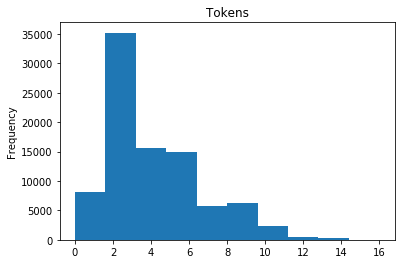

In [38]:
dft.token_str.str.len().plot.hist(bins=10, title="Tokens")

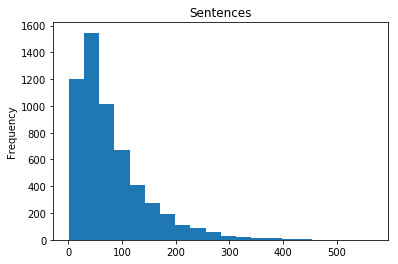

In [39]:
sents.content.str.len().plot.hist(bins=20, title='Sentences')

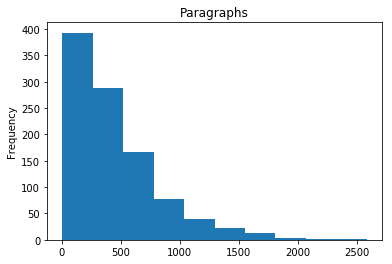

In [40]:
paras.content.str.len().plot.hist(title="Paragraphs")

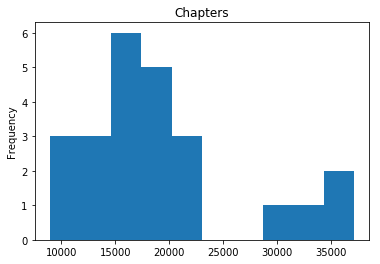

In [41]:
chaps.content.str.len().plot.hist(title="Chapters")

# Save work to CSV

In [42]:
dft.to_csv(csv_file)